In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 116s 1us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

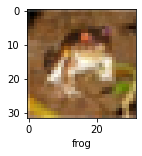

In [12]:
plot_sample(X_train, y_train, 0)

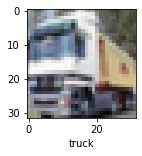

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 96s 60ms/step - loss: 1.8065 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6181 - accuracy: 0.4300
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5395 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4806 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4310 - accuracy: 0.4948


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.47      0.53      1000
           1       0.44      0.78      0.56      1000
           2       0.39      0.31      0.35      1000
           3       0.39      0.22      0.28      1000
           4       0.42      0.41      0.41      1000
           5       0.44      0.32      0.37      1000
           6       0.38      0.75      0.50      1000
           7       0.72      0.37      0.49      1000
           8       0.54      0.69      0.60      1000
           9       0.60      0.38      0.47      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4778 - accuracy: 0.4702
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1159 - accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9898 - accuracy: 0.6563
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9050 - accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8373 - accuracy: 0.7106
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7832 - accuracy: 0.7281
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7340 - accuracy: 0.7475
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6961 - accuracy: 0.7575
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6601 - accuracy: 0.7700
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.9715 - accuracy: 0.6875


[0.9714950323104858, 0.6875]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.2881073e-04, 2.3138451e-05, 2.1648929e-03, 9.8015356e-01,
        1.3897840e-04, 1.6715489e-02, 2.3837785e-04, 2.1847791e-05,
        2.6549282e-04, 1.4946438e-04],
       [5.4499297e-03, 1.0881280e-02, 1.7298142e-05, 5.3075437e-06,
        1.4318310e-08, 1.4288015e-10, 1.7702417e-08, 1.0828739e-09,
        9.8361325e-01, 3.2918146e-05],
       [6.8347983e-02, 4.8961392e-01, 2.2288309e-03, 5.9972559e-03,
        3.3664744e-04, 5.3469220e-04, 8.0783479e-04, 2.3007323e-03,
        4.2487612e-01, 4.9559674e-03],
       [9.6952516e-01, 1.6531065e-02, 2.3774647e-03, 6.5101479e-04,
        2.1370163e-03, 5.3551116e-06, 3.5040808e-05, 9.4454314e-05,
        8.2868896e-03, 3.5643982e-04],
       [4.0683237e-05, 1.7772079e-04, 7.5410781e-03, 2.6036477e-02,
        4.7166049e-01, 3.0537567e-03, 4.9142760e-01, 3.0480915e-05,
        1.2190767e-05, 1.9563378e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:8]

[3, 8, 1, 0, 6, 6, 1, 6]

In [23]:
y_test[:8]

array([3, 8, 8, 0, 6, 6, 1, 6], dtype=uint8)

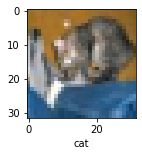

In [24]:
plot_sample(X_test, y_test,0)

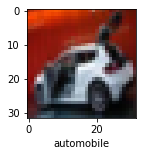

In [25]:
plot_sample(X_test, y_test,6)

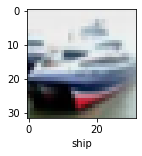

In [26]:
plot_sample(X_test, y_test,1)

In [27]:
classes[y_classes[3]]

'airplane'

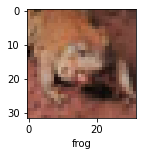

In [28]:
plot_sample(X_test, y_test,5)

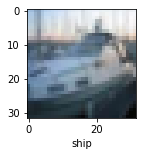

In [29]:
plot_sample(X_test, y_test,2)